In [2]:
#Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import researchpy as rp
from lifelines import KaplanMeierFitter

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from scipy.stats import mannwhitneyu
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn import metrics

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
import matplotlib.ticker as mtick

Importing the Dataset

In [3]:
data= pd.read_csv('Customer-Churn.csv')

Checking the Dataset for first 5 rows

In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Below are the Dataset types

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data["Contract"].nunique()

3

In [ ]:
data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
data["PaymentMethod"].nunique()

4

In [ ]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
data["InternetService"].nunique()

3

In [ ]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
data["customerID"].nunique()

7043

In [ ]:
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
#cols = cols[cols == True].reset_index()
#cols = cols["index"].tolist()

In [ ]:
# for col in data.columns[1:]:
#      if col in cols:
#         if data[col].dtype != 'object':
#              data[col] =  data[col].fillna(data[col].mean()).round(0)

In [ ]:
data['TotalCharges'] =  data['TotalCharges'].fillna(data['TotalCharges'].mean()).round(0)

In [ ]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
#churn_df = churn_df.drop(['customerID','PaperlessBilling'],axis=1)

In [ ]:
Method = data[[ "customerID", "PaymentMethod"]]
sectors = Method  .groupby ("PaymentMethod")
Method  = pd.DataFrame(sectors["customerID"].count())
Method.rename(columns={'customerID':'No. of Payment Methods'}, inplace=True)

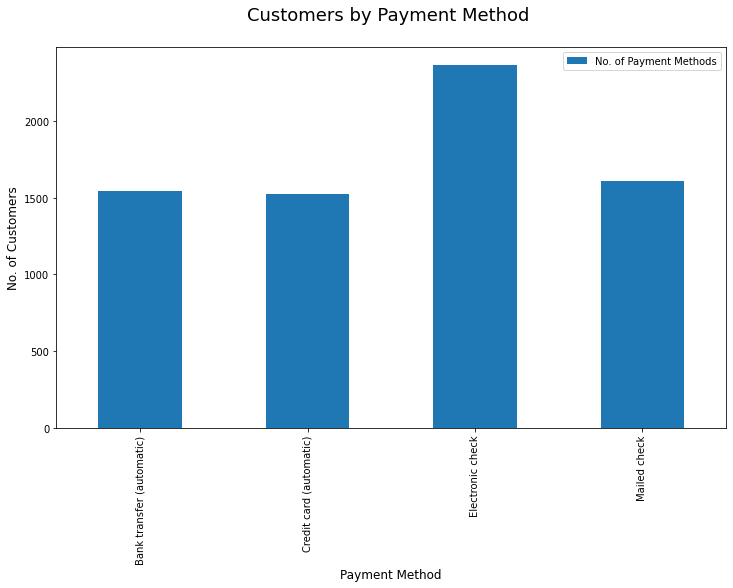

In [ ]:
plot= Method[["No. of Payment Methods"]].plot.bar(title = 'Customers by Payment Method', legend =True, figsize =(12, 7))

plt.ylabel('No. of Customers', fontsize = "12")
plt.xlabel('Payment Method', fontsize = "12")
plt.title('Customers by Payment Method \n', fontsize = "18")
plt.legend()

In [ ]:
contract= data[["customerID", "Contract"]]
sectors = contract.groupby ("Contract")
contract= pd.DataFrame(sectors["customerID"].count())
contract.rename(columns={'customerID':'No. of Customers'}, inplace=True)

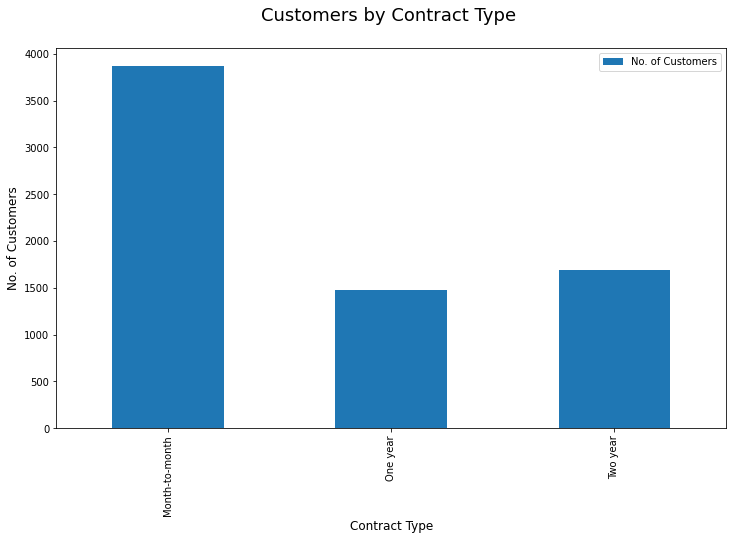

In [ ]:
plot= contract[["No. of Customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, figsize =(12, 7))

plt.ylabel('No. of Customers', fontsize = "12")
plt.xlabel('Contract Type', fontsize = "12")
plt.title('Customers by Contract Type \n', fontsize = "18")
plt.legend()

In [ ]:
Partner= data[["customerID", "Partner"]]
Partner = Partner.groupby ("Partner")
Partner= pd.DataFrame(sectors["customerID"].count())
Partner.rename(columns={'customerID':'No. of Partners'}, inplace=True)

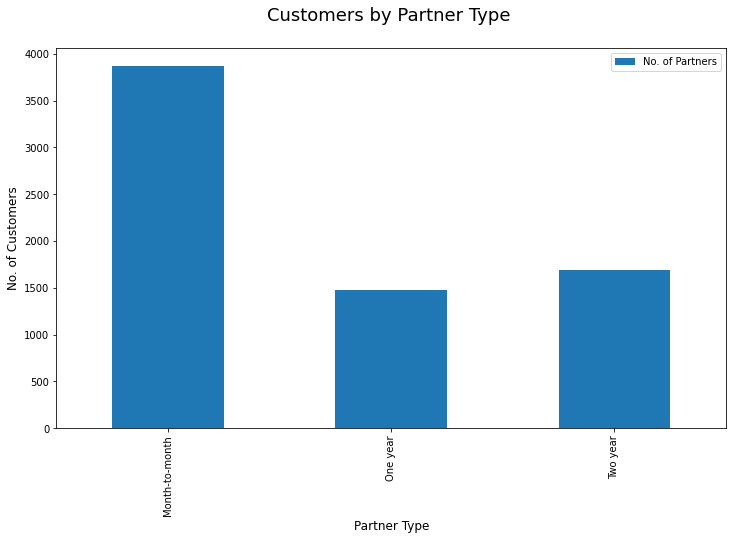

In [ ]:
plot= Partner[["No. of Partners"]].plot.bar(title = 'Customers by Partner Type', legend =True, figsize =(12, 7))

plt.ylabel('No. of Customers', fontsize = "12")
plt.xlabel('Partner Type', fontsize = "12")
plt.title('Customers by Partner Type \n', fontsize = "18")
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


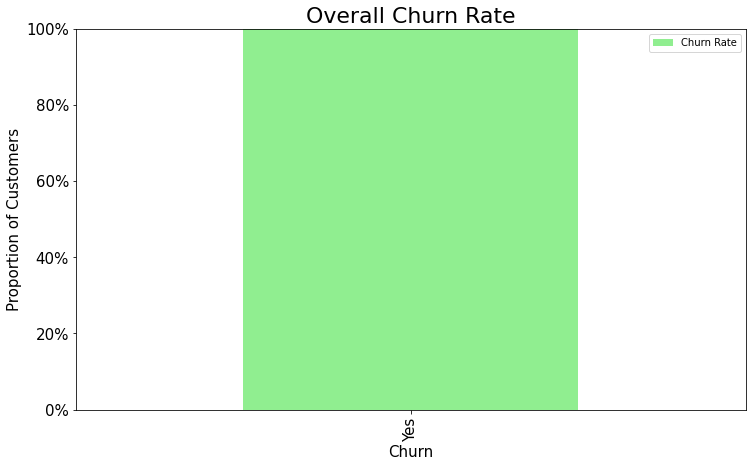

In [ ]:
   #Step 9.3: Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------

churn_rate = data[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
plot =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, color='lightgreen', figsize =(12, 7), fontsize = 15, ylim =(0,100))

plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Proportion of Customers', fontsize = 15)
plt.xlabel('Churn',fontsize = 15)
plt.title('Overall Churn Rate', fontsize = 22)
plt.legend()

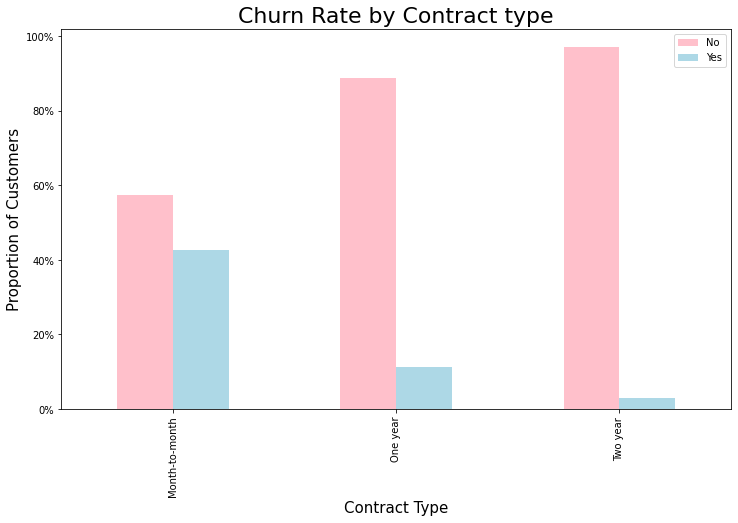

In [ ]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()
plot = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', figsize = (12,7), color = ('pink','lightblue'))
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Proportion of Customers', fontsize = 15)
plt.xlabel('Contract Type',fontsize = 15)
plt.title('Churn Rate by Contract type', fontsize = 22)
plt.legend()

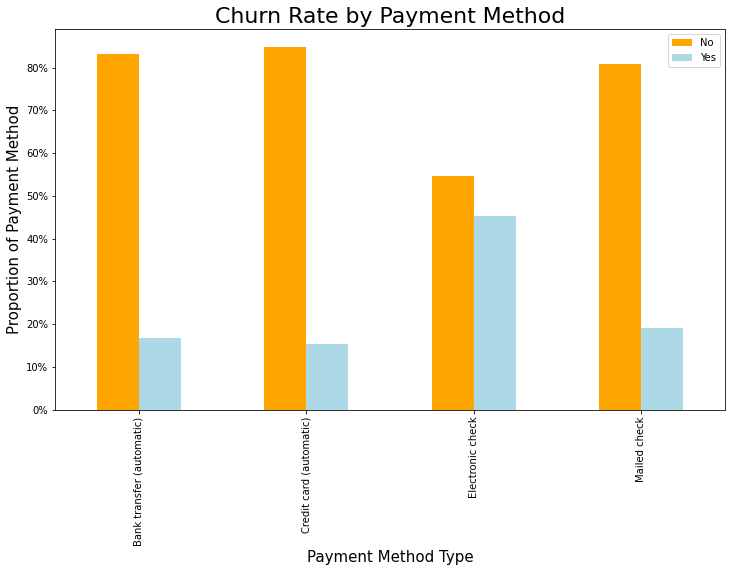

In [ ]:
PaymentMethod_churn = data.groupby(['PaymentMethod','Churn']).size().unstack()
plot = (PaymentMethod_churn.T*100.0 / PaymentMethod_churn.T.sum()).T.plot(kind='bar', figsize = (12,7), color = ('orange','lightblue'))
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Proportion of Payment Method', fontsize = 15)
plt.xlabel('Payment Method Type',fontsize = 15)
plt.title('Churn Rate by Payment Method', fontsize = 22)
plt.legend()

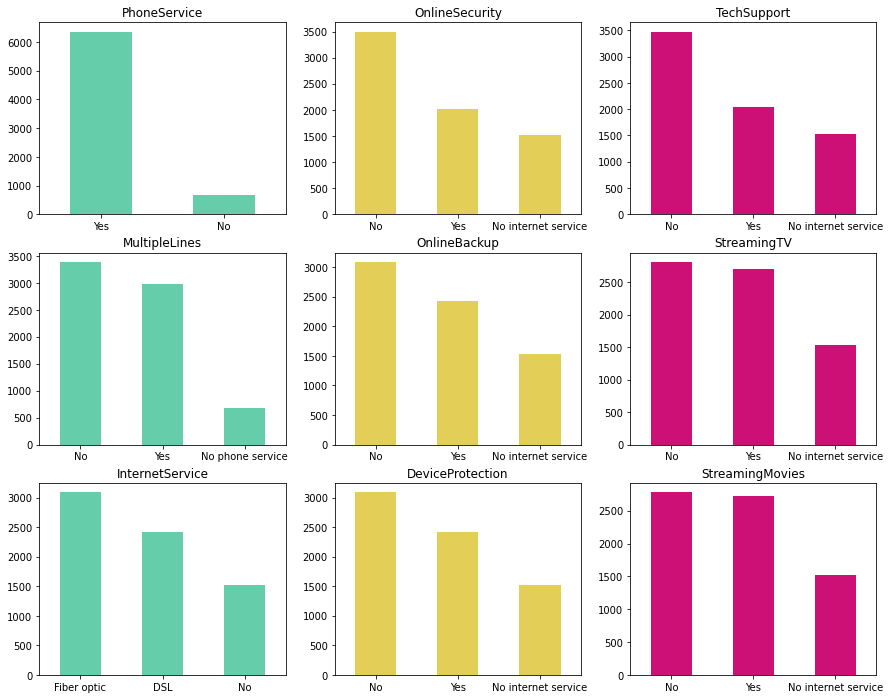

In [ ]:
#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#66CDAA' )
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#E3CF57')
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#CD1076')
    ax.set_title(item)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Churn, test_size=0.2, random_state=42, stratify=data.Churn)

In [ ]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
X_train.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
X_train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
3810,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


In [ ]:
for c in X_train.drop(['customerID'], axis=1).columns:
    print("---- %s ---" % c)
    print(X_train[c].value_counts())
    print("")

---- gender ---
Male      2833
Female    2801
Name: gender, dtype: int64

---- SeniorCitizen ---
0    4714
1     920
Name: SeniorCitizen, dtype: int64

---- Partner ---
No     2905
Yes    2729
Name: Partner, dtype: int64

---- Dependents ---
No     3955
Yes    1679
Name: Dependents, dtype: int64

---- tenure ---
1     487
72    292
2     187
3     150
71    142
     ... 
21     45
44     43
28     42
36     40
0       8
Name: tenure, Length: 73, dtype: int64

---- PhoneService ---
Yes    5075
No      559
Name: PhoneService, dtype: int64

---- MultipleLines ---
No                  2685
Yes                 2390
No phone service     559
Name: MultipleLines, dtype: int64

---- InternetService ---
Fiber optic    2483
DSL            1937
No             1214
Name: InternetService, dtype: int64

---- OnlineSecurity ---
No                     2797
Yes                    1623
No internet service    1214
Name: OnlineSecurity, dtype: int64

---- OnlineBackup ---
No                     2442
Yes    

Univariate distributions (TotalCharges)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


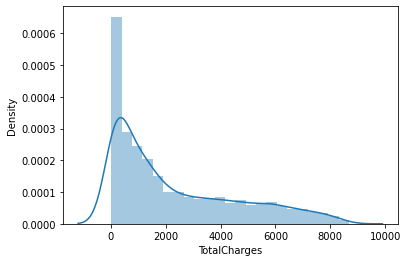

In [ ]:
sns.distplot(X_train.TotalCharges)

MonthlyCharges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


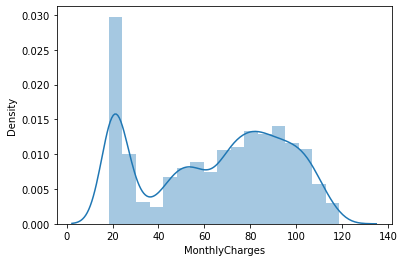

In [ ]:
sns.distplot(X_train.MonthlyCharges)

Bimodal distribution is fascinating. One set of customers pays a low price, while another pays a significantly higher price. This, I'm sure, represents the quantity and kind of services users have.

tenure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


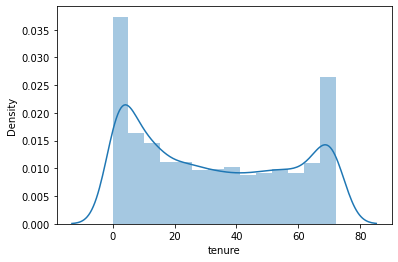

In [ ]:
sns.distplot(X_train.tenure)

An additional bimodal distribution. Customers that have been with the company for a long period are one peak, while customers who have recently joined are another. Because this is how services are invoiced, I'm going to presume tenure is measured in months.

Bivariate

Churn by TotalCharges

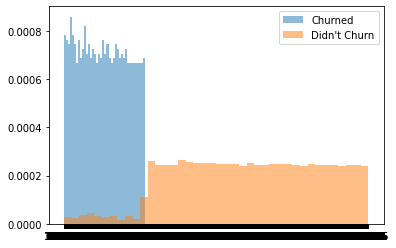

In [ ]:
bins = 40
plt.hist(X_train[X_train.Churn == 'Yes'].TotalCharges, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(X_train[X_train.Churn == 'No'].TotalCharges, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend()
plt.show()

Customers who didn’t churn had more TotalCharges

Churn by MonthlyCharges

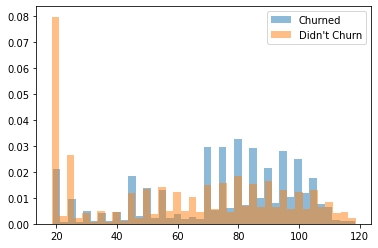

In [ ]:
bins = 40
plt.hist(X_train[X_train.Churn == 'Yes'].MonthlyCharges, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(X_train[X_train.Churn == 'No'].MonthlyCharges, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend()
plt.show()

Customers who churned were more likely to be on the upper end of the MonthlyCharges distribution, whereas those who didn't churn were more likely to be on the low end.

Churn by tenure

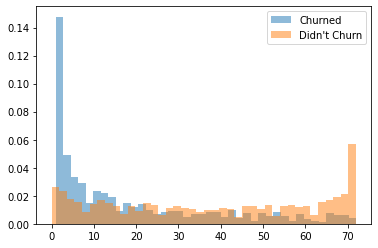

In [ ]:
bins = 40
plt.hist(X_train[X_train.Churn == 'Yes'].tenure, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(X_train[X_train.Churn == 'No'].tenure, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend()
plt.show()

The first few months of employment — months 1–10 – appear to be crucial, given this is when the majority of turnover occurs. In the centre, there appears to be a type of branching pattern. Maybe there's a survivor effect at work here: members who make it over a particular tenure duration are more inclined to stay for the long haul.

Churn by categorical variables

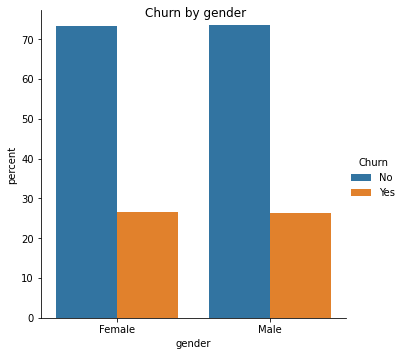

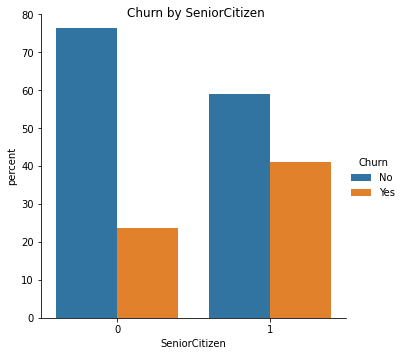

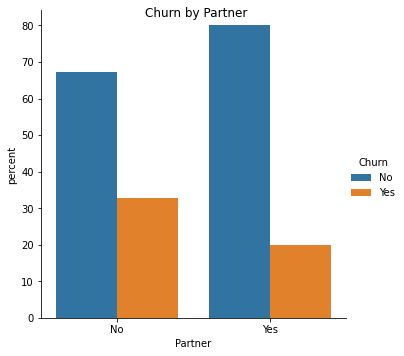

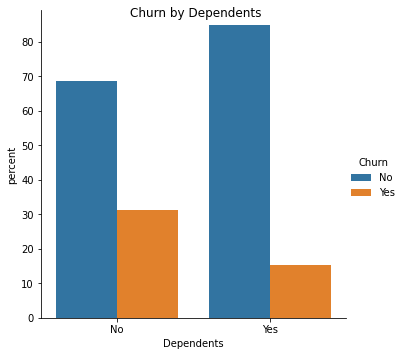

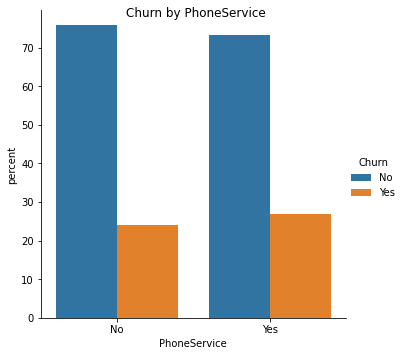

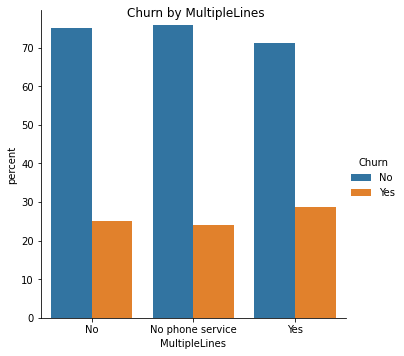

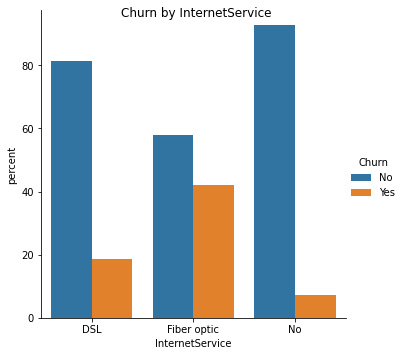

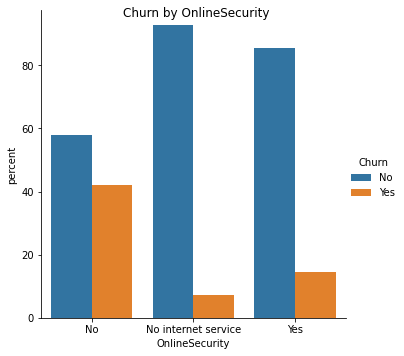

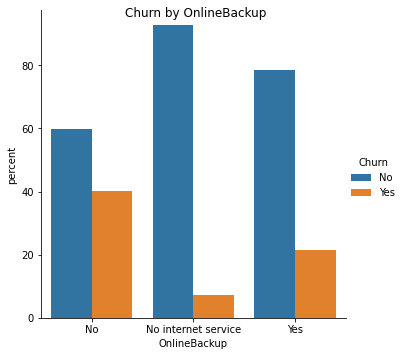

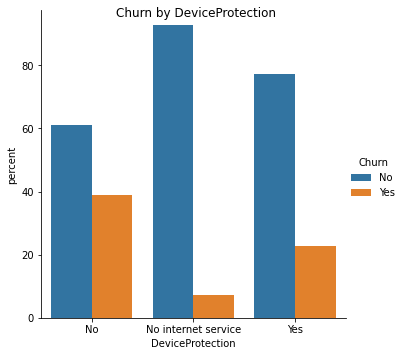

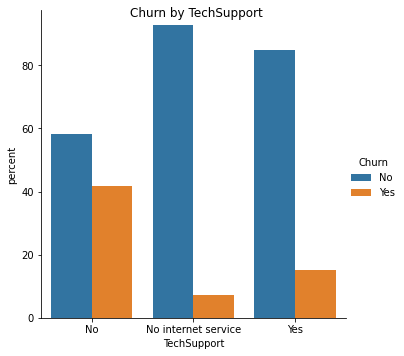

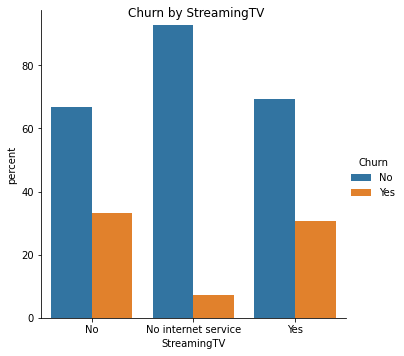

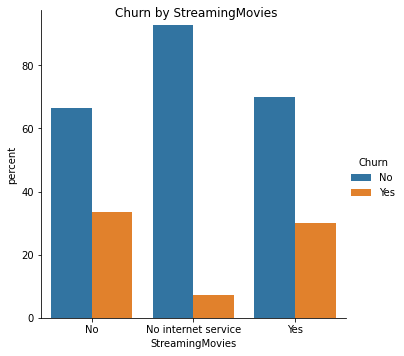

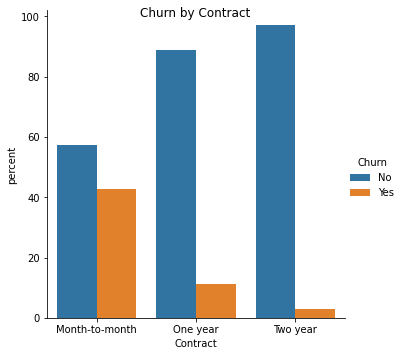

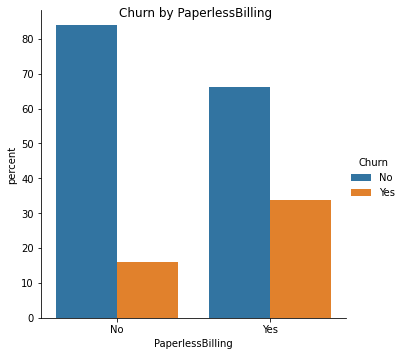

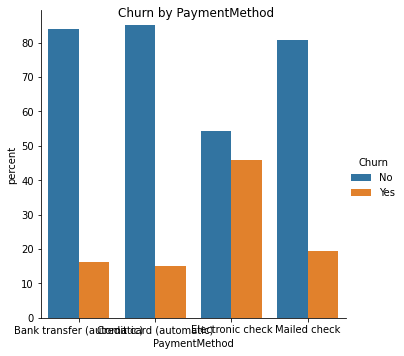

In [ ]:
cat_var = X_train.columns.tolist()
cat_var = [e for e in cat_var if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

y = 'Churn'
for x in cat_var:
    plot = X_train.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

The most interesting variables seem to be:

1. SeniorCitizen
2. Partner
3. Dependents
4. InternetService
5. OnlineSecurity
6. OnlineBackup
7. DeviceProtection
8. TechSupport
9. Contract
10. PaperlessBilling
11. PaymentMethod

Many of them appear to have a hidden variable that indicates either tech savvy or service benefit maximization – or both. Customers that have InternetService, for example, are less likely to churn if they also get TechSupport, OnlineSecurity, or OnlineBackup. A tech-savvy individual would not pay for these services and instead "roll their own."

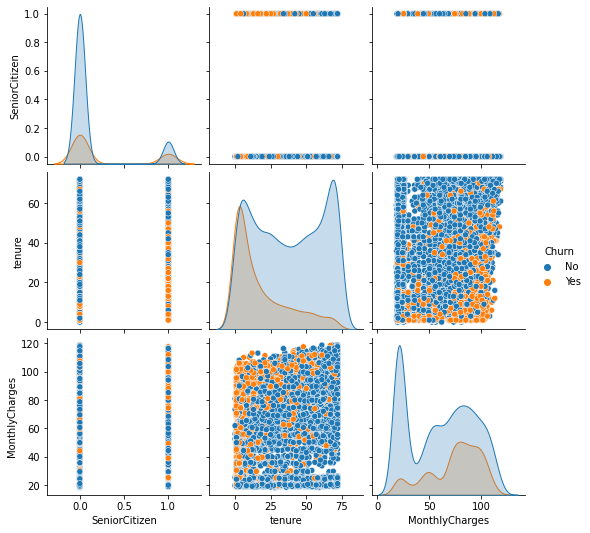

In [ ]:
sns.pairplot(data = data, hue='Churn')
plt.show()

OnlineBackup vs. OnlineSecurity

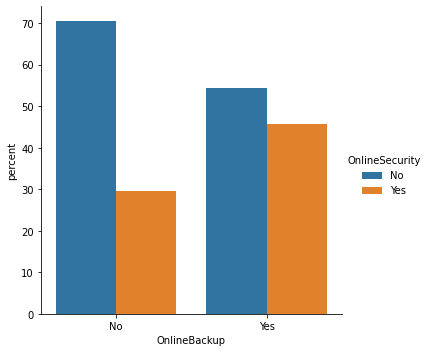

In [ ]:
x,y = 'OnlineBackup', 'OnlineSecurity'
plot = X_train[X_train.InternetService != 'No'].groupby(x)[y]\
    .value_counts(normalize=True).mul(100)\
    .rename('percent').reset_index()\
    .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')

Survival Analysis of the target variable based on certain important features. 
Survival analysis helps us analyze the expected duration of time before a specific event occurs

In [152]:
kmp=KaplanMeierFitter()

In [178]:
X1=data['TotalCharges']  # Represents duration

Y1=data['Churn'] # Represents whether sample was censored or not

kmp.fit(X1, Y1)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

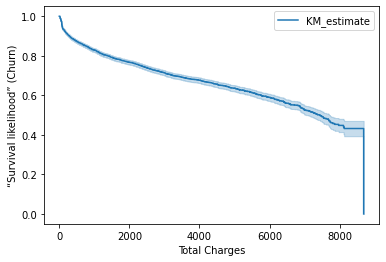

In [179]:
kmp.plot()   #In order to plot the survival curve

plt.xlabel("Total Charges")

plt.ylabel("“Survival likelihood” (Churn)")

plt.show()

In [180]:
X2=data['MonthlyCharges']  # Represents duration

Y2=data['Churn'] # Represents whether sample was censored or not

kmp.fit(X2, Y2)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

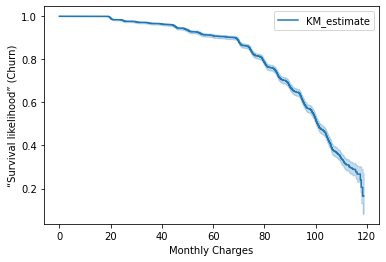

In [181]:
kmp.plot()   #In order to plot the survival curve

plt.xlabel("Monthly Charges")

plt.ylabel("“Survival likelihood” (Churn)")

plt.show()

In [182]:
X3=data['tenure']  # Represents duration

Y3=data['Churn'] # Represents whether sample was censored or not

kmp.fit(X3, Y3)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

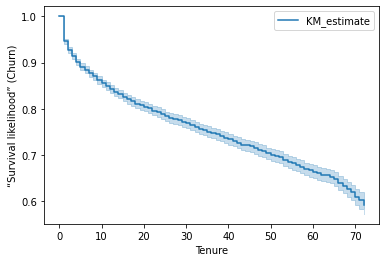

In [183]:
kmp.plot()   #In order to plot the survival curve

plt.xlabel("Tenure")

plt.ylabel("“Survival likelihood” (Churn)")

plt.show()

Mann and Whitney’s U-test - To find the difference between two independent samples of ordinal data.


In [174]:
batch_1 =list(data['Dependents'])
batch_2 =list(data['Churn'])
  
# perform mann whitney test
stat, p_value = mannwhitneyu(batch_1, batch_2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=23953243.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


In [172]:
batch_1 = list(data['Dependents'])
batch_2 = list(data['PaymentMethod'])
  
# perform mann whitney test
stat, p_value = mannwhitneyu(batch_1, batch_2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=8671826.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


In [175]:
batch_1 = list(data['Contract'])
batch_2 = list(data['PaymentMethod'])
  
# perform mann whitney test
stat, p_value = mannwhitneyu(batch_1, batch_2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=13587972.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


TechSupport vs. OnlineSecurity

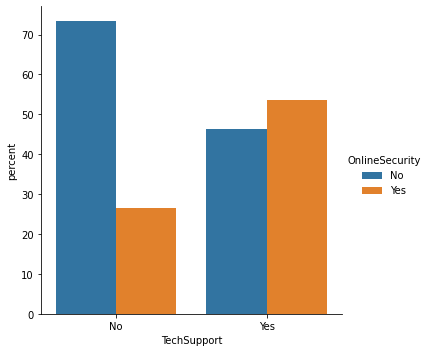

In [ ]:
x,y = 'TechSupport', 'OnlineSecurity'
plot = X_train[X_train.InternetService != 'No'].groupby(x)[y]\
    .value_counts(normalize=True).mul(100)\
    .rename('percent').reset_index()\
    .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')

StreamingTV vs. StreamingMovies

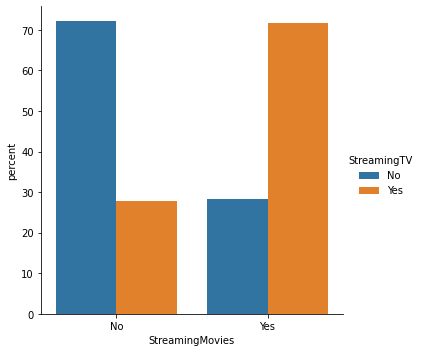

In [ ]:
x,y = 'StreamingMovies', 'StreamingTV'
plot = X_train[X_train.InternetService != 'No'].groupby(x)[y]\
    .value_counts(normalize=True).mul(100)\
    .rename('percent').reset_index()\
    .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')

DeviceProtection vs. OnlineSecurity

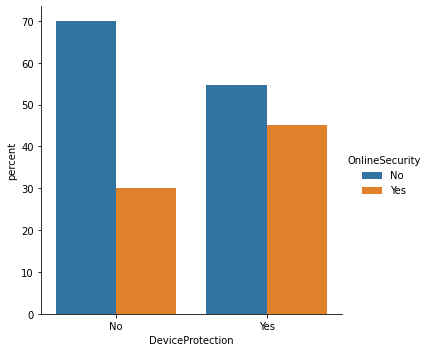

In [ ]:
x,y = 'DeviceProtection', 'OnlineSecurity'
plot = X_train[X_train.InternetService != 'No'].groupby(x)[y]\
    .value_counts(normalize=True).mul(100)\
    .rename('percent').reset_index()\
    .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')

Although there is some redundancy (particularly when it comes to streaming TV vs. movies), they are not fully redundant. I believe they have enough variation to be independent predictors.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# data['customerID']= label_encoder.fit_transform(data['customerID']) 
data['Partner']= label_encoder.fit_transform(data['Partner']) 
data['Dependents']= label_encoder.fit_transform(data['Dependents']) 
data['PhoneService']= label_encoder.fit_transform(data['PhoneService']) 
data['MultipleLines']= label_encoder.fit_transform(data['MultipleLines']) 
data['InternetService']= label_encoder.fit_transform(data['InternetService']) 
data['OnlineSecurity']= label_encoder.fit_transform(data['OnlineSecurity']) 
data['OnlineBackup']= label_encoder.fit_transform(data['OnlineBackup']) 
data['gender']= label_encoder.fit_transform(data['gender']) 
data['DeviceProtection']= label_encoder.fit_transform(data['DeviceProtection']) 
data['TechSupport']= label_encoder.fit_transform(data['TechSupport']) 
data['StreamingTV']= label_encoder.fit_transform(data['StreamingTV']) 
data['StreamingMovies']= label_encoder.fit_transform(data['StreamingMovies']) 
data['PaymentMethod']= label_encoder.fit_transform(data['PaymentMethod']) 
data['Contract']= label_encoder.fit_transform(data['Contract']) 
data['Churn']= label_encoder.fit_transform(data['Churn'])
# data['PaperlessBilling']= label_encoder.fit_transform(data['PaperlessBilling'])

In [ ]:
data.head(5)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,29.85,30.0,0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,3,56.95,1890.0,0
2,1,0,0,2,1,0,0,2,2,0,0,0,0,0,3,53.85,108.0,1
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,42.30,1841.0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,2,70.70,152.0,1


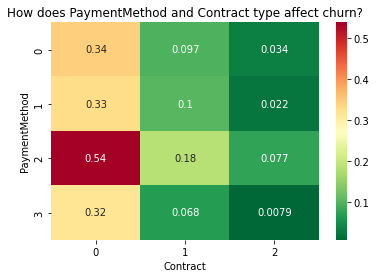

In [ ]:
# How does PaymentMethod and Contract type affect churn?
## Create pivot table
result = pd.pivot_table(data=data, index='PaymentMethod', columns='Contract',values='Churn')
## create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does PaymentMethod and Contract type affect churn?')
plt.show()

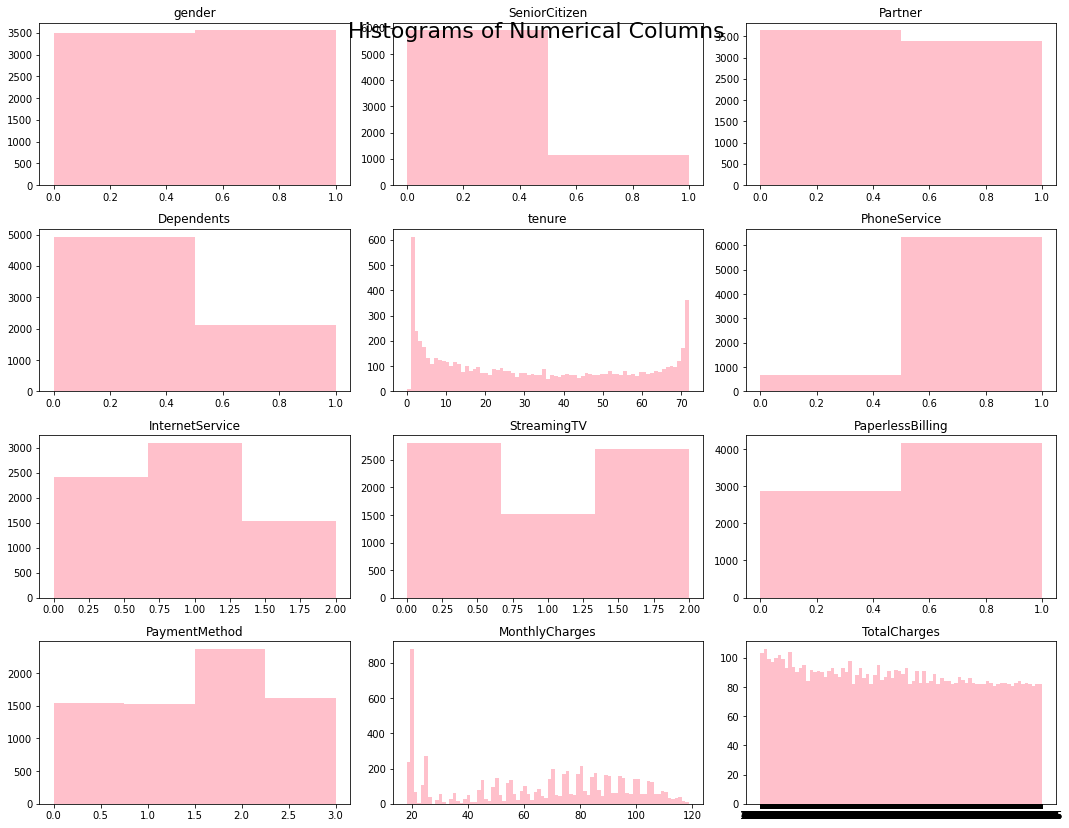

In [ ]:
data1 = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'PaperlessBilling','PaymentMethod',
        'MonthlyCharges', 'TotalCharges']]

fig = plt.figure(figsize=(15,18))
plt.suptitle('Histograms of Numerical Columns',fontsize =22,horizontalalignment="center",)

for i in range(data1.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(data1.columns.values[i])

    value = np.size(data1.iloc[:, i].unique())
    if value >= 80:
        value = 80
    
    plt.hist(data1.iloc[:, i], bins=value, color = 'pink')
plt.tight_layout(rect=[0, 0.05, 1, 1])

Text(0.5, 1.0, 'Co-linearity of Monthly Charges and Total Charges')

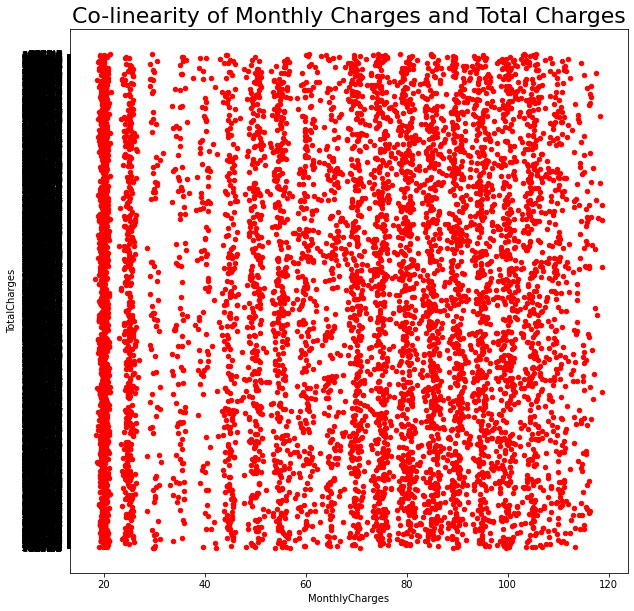

In [ ]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (10, 10), x = 'MonthlyCharges',y='TotalCharges', color =  'red')
plt.title('Co-linearity of Monthly Charges and Total Charges', fontsize = "22")

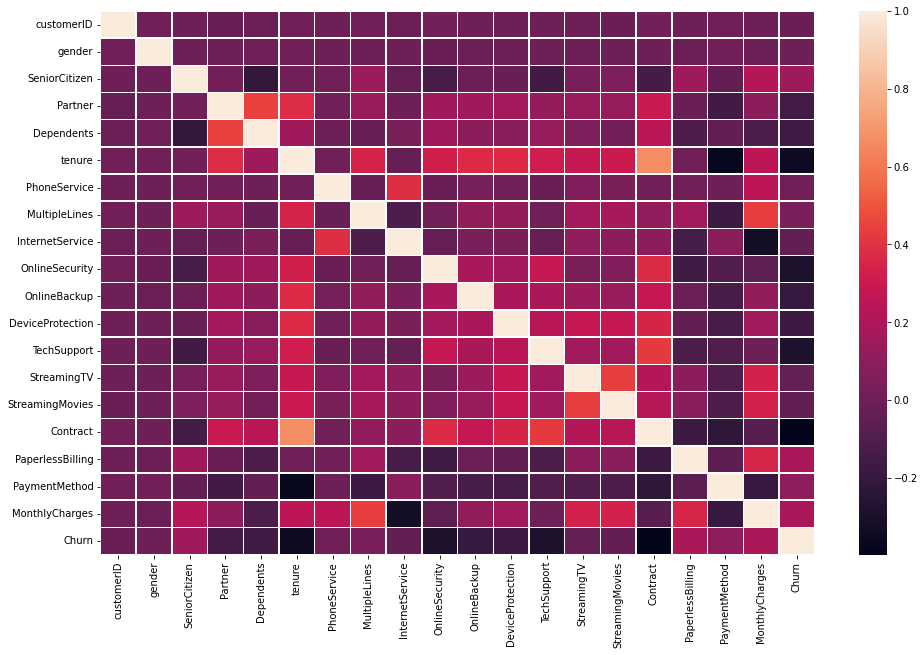

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), linewidth=0.5)

# Conclusions from EDA

We can immediately draw a few inferences now that we have a better picture of what's going on in our data:

1. Those on a month-to-month contract appear to be more inclined to churn.
2. Senior citizens are also more prone to churn and stay for longer periods of time.
3. The dataset's majority of variables are categorical. We'll have to encrypt them.
4. There are a few NaNs that must be imputed.
5. Customers who receive technical assistance are less likely to leave.
6. Churn is far more common for those who pay by electronic check.
7. Those who signed up for Fiber are more likely to churn than those who signed up for DSL.
8. Churned clients have a shorter average tenure.


Now, let's drop CustomerID and PaperlessBilling for further Analysis

In [ ]:
data = data.drop(['customerID','PaperlessBilling','SeniorCitizen'],axis=1)

In [ ]:
data.head(5)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,30.0,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1890.0,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.0,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1841.0,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,152.0,Yes


# **Modelling Stage**

Features and labels split

In [ ]:
X=data.drop(['Churn'],axis=1)
y=data['Churn']

In [ ]:
X

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,29.85,30.0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,3,56.95,1890.0
2,1,0,0,2,1,0,0,2,2,0,0,0,0,0,3,53.85,108.0
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,42.30,1841.0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,2,70.70,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,2,0,2,0,2,2,2,2,1,3,84.80,1990.0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,103.20,7363.0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,2,29.60,346.0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,3,74.40,307.0


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


Chi-square test for optimal feature selection. Here top 5 features are selected using this test

In [ ]:
chi2_selector = SelectKBest(chi2, k=5)
X_new = chi2_selector.fit_transform(X, y)

In [ ]:
chi2_selector1 = SelectKBest(chi2, k=1)
X_mod = chi2_selector.fit_transform(X, y)

In [ ]:
X_mod

array([[  30.],
       [1890.],
       [ 108.],
       ...,
       [ 346.],
       [ 307.],
       [6844.]])

In [ ]:
print('Initial number of features:', X.shape[1])
print('Current number of features:', X_new.shape[1])

Initial number of features: 17
Current number of features: 5


Test train splitting of data using values of X and y for training and modelling

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.15, random_state = 0 )

K-NEAREST NEIGHBOR ALCORITHM:
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(Y_test, y_pred))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(Y_test, y_pred))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(Y_test, y_pred))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       791
           1       0.58      0.36      0.44       266

    accuracy                           0.77      1057
   macro avg       0.69      0.64      0.65      1057
weighted avg       0.75      0.77      0.75      1057


 metrics.confusion_matrix(ytest, predict) 
 [[721  70]
 [170  96]]

 metrics.accuracy_score(ytest, predict) 
 0.7729422894985809


Naive Bayes algorithm - It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(Y_test, preds))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(Y_test, preds))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(Y_test, preds))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       791
           1       0.49      0.69      0.57       266

    accuracy                           0.74      1057
   macro avg       0.68      0.72      0.69      1057
weighted avg       0.78      0.74      0.75      1057


 metrics.confusion_matrix(ytest, predict) 
 [[599 192]
 [ 83 183]]

 metrics.accuracy_score(ytest, predict) 
 0.7398297067171239


Principal component analysis (PCA) on the given data: It is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 0 )

In [188]:
pca = PCA(n_components = 2)
 
X_train1 = pca.fit_transform(X_train1)

X_test1 = pca.transform(X_test1)
 
explained_variance = pca.explained_variance_ratio_


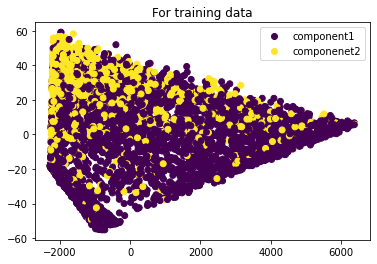

In [191]:
plot = plt.scatter(X_train1[:,0], X_train1[:,1], c=Y_train1)
plt.legend(handles=plot.legend_elements()[0],labels=['component1','componenet2'])
plt.title('For training data')
plt.show()

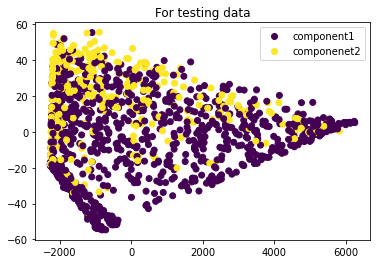

In [192]:
plot1 = plt.scatter(X_test1[:,0], X_test1[:,1], c=Y_test1)
plt.legend(handles=plot1.legend_elements()[0],labels=['component1','componenet2'])
plt.title('For testing data')
plt.show()

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, Y_train1)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test1)

In [ ]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(Y_test1, y_pred))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(Y_test1, y_pred))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(Y_test1, y_pred))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1041
           1       0.58      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409


 metrics.confusion_matrix(ytest, predict) 
 [[930 111]
 [212 156]]

 metrics.accuracy_score(ytest, predict) 
 0.7707594038325053
